# <u>Caospy's Tutorial</u>

In this notebook you'll find the tools and functions of Caospy, so let's go to learn!.

## Prerequisites

You’ll need to know a bit of Python. For a refresher, see the [The Python Tutorial](https://docs.python.org/3/tutorial/).

To work the examples, you’ll need matplotlib installed in addition to Caospy.

## Imports 

Like any Python library, it needs to be imported. We suggest you the following way.

In [1]:
import caospy as cp 

Also we need matplotlib to work with the plots. 

In [2]:
import matplotlib.pyplot as plt

## Functions 

Caospy is a Python package to analyze dynamical systems in 1, 2 or 3 dimensions; so depending on the dimension you have different utilities, in the following sections there are examples that show how to use them. 

### One dimensional analysis

We study a one dimensional ODE, which is defined by the equation:

$$\frac{dy}{dt} = \lambda y-y^2 \hspace{2 cm} \lambda = cte $$   

In Caospy a function can be initialized either symbolically with strings or with python's functions. In the first option, you can use all the Caospy's tools, instead, using the functional way, the possibilities are reduced.

We'll develop the above equation symbolically.  Let's define first the ODE, variables, parameters and name.

In [3]:
fun = ["λ*y-y**2"]  # Define de ODE's RHS 
var = ["y"] # Variables
par = ["λ"] # Parameters
name = "1D Ode example" 

Now we need to initialize the study case, given that our ODE is 1D we use:

In [4]:
Ode_1d = cp.OneDim(var, fun, par, name)

An important piece information about dynamical systems are their [fixed points](https://mathworld.wolfram.com/FixedPoint.html).  Caospy displays a data frame with the respective fixed point, slope and stability of it.

In [5]:
p = [1] # Parameters's value
df = Ode_1d.stability(p)
df

,Fixed Point,Slope,Stability
0,[0.0],1.0,False
1,[1.0],-1.0,True


Now let's do a numerical integration to get the solution in a specific time. 

In [6]:
t0 = 0 # Initial time
tf = 9 # Final time 
N = 500 # Steps's numbers to go from t0 to tf
y0 = [0.1] # Initial value
sol = Ode_1d.time_evolution(y0, p, t0, tf, N)

The plot of time (hoizontal axis) - $y$ value (vertical axis) is:

<AxesSubplot:>

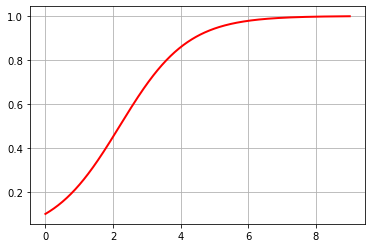

In [7]:
sol.plot_trajectory("t-y")

Note you that to plot the time in the horizontal axis and in the vertical axis $y$ we wrote the string "$y$" in the plot_trajectorie function. This concept is important to plot and we'll comeback on it later.

You can set up the chart with matplotlib. 

Text(0.5, 1.0, '1D Ode analyze')

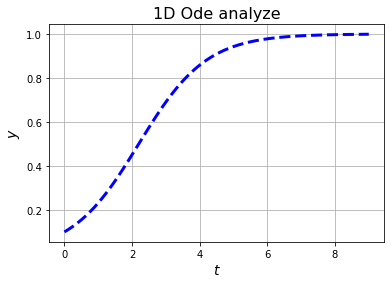

In [8]:
fig, ax = plt.subplots()
kws = {"color": "b",
        "lw": 3,
         "linestyle": "--"}
ax = sol.plot_trajectory("t-y", kws = kws)
ax.set_xlabel(r"$t$", fontsize=14)
ax.set_ylabel(r"$y$", fontsize=14)
ax.set_title("1D Ode analyze", fontsize=16)

If you just want to do a numerical integration, you can define your problem with the Python's functions and  Functional class.

<AxesSubplot:>

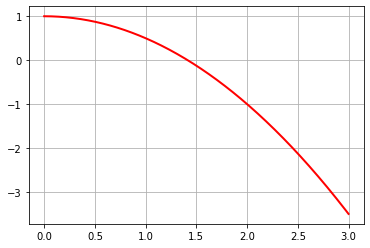

In [9]:
def fun(y, t, par): # Define function
    dy = par*y
    return [dy]
fun = cp.Functional(fun, "Other example")
p = -1# Parameter's value
t0 = 0 # Initial time
tf = 3 # Final Time
N = 500 # Steps
y0 = [1] # Initial  Value
sol = fun.time_evolution(y0, p, t0, tf, N)
sol.plot_trajectory("t-x_0")


If you don't assign the  variables' name, the package does it automatically with $x$_i, where $i=0,1,..n-1$ and $n$ number of variables.


### Two dimensional analysis

We're studying the 2D ODE system:

$$ \frac{du}{dt} = u-v  \\
   \frac{dv}{dt} = 4u-2v  $$
   
Like before, we have to initialize the problem 


In [10]:
fun = ["u+v", "u-2*v"] # Function
var = ["u", "v"] # Variables
par = [] # Parameters}
name = "Ode 2D"
Ode_2d = cp.TwoDim(var, fun, par, name)

In two dimensions there is more information about the system. Besides fixed points, we obtain eigenvalues, eigenvectors and classify the fixed points. We encourage you to read "NONLINEAR 
DYNAMICS AND 
CHAOS - Steven H. Strogatz"

In [11]:
df = Ode_2d.fixed_point_classify(par)
df

,$u$,$v$,$λ_{1}$,$λ_{2}$,$σ$,$Δ$,$Type$
0,0.0,0.0,1.3,-2.3,(-1+0j),(-3+0j),Saddle


If you just have eigenvalues or eigenvectors:

In [12]:
Ode_2d.eigenvalues(par)

array([[ 1.30277564, -2.30277564]])

In [13]:
Ode_2d.eigenvectors(par)

array([[[ 0.95709203,  0.28978415],
        [-0.28978415,  0.95709203]]])

Now we'll integrate the system numerically and plot the solution. Rememember it,  you have to specify the variables to graph in the plot_trajectory function.


Text(0.5, 1.0, '2D Ode analyze')

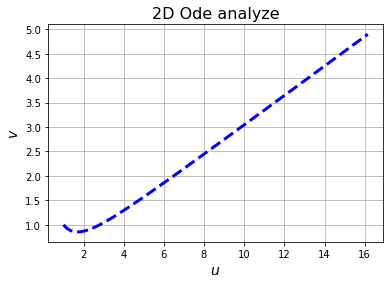

In [14]:
t0 = 0 # Initial time
tf = 2 # Final time
N =800  # Steps
x0 = [1, 1] # Initial values vector
sol = Ode_2d.time_evolution(x0, par, t0, tf, N)
fig, ax = plt.subplots()
ax = sol.plot_trajectory("u-v", kws = kws)
ax.set_xlabel(r"$u$", fontsize=14)
ax.set_ylabel(r"$v$", fontsize=14)
ax.set_title("2D Ode analyze", fontsize=16)

### Three dimensional analyze

Now we'll work with 3D ODE sysmtems. A powerful utility is that Caospy has well studied systems implemented. They are: [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system), [Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation), [Logistic map](https://en.wikipedia.org/wiki/Logistic_map) and [Rössler attractor](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor). In this section we work with the 3D Lorenz system. 

In [15]:
lorenz = cp.Lorenz()

Like before, you can compute information about it.

In [16]:
par = [10, 28, 8/3]
lorenz.eigenvalues(par)

array([[-13.85457791 +0.j        ,   0.09395562+10.19450522j,
          0.09395562-10.19450522j],
       [-22.82772345 +0.j        ,  11.82772345 +0.j        ,
         -2.66666667 +0.j        ],
       [-13.85457791 +0.j        ,   0.09395562+10.19450522j,
          0.09395562-10.19450522j]])

In [17]:
lorenz.eigenvectors(par)

array([[[ 0.85566502+0.j        , -0.32982275+0.j        ,
          0.39881615+0.j        ],
        [-0.26611932-0.29501017j,  0.03212861-0.56907743j,
          0.71921356+0.j        ],
        [-0.26611932+0.29501017j,  0.03212861+0.56907743j,
          0.71921356-0.j        ]],

       [[-0.61481679+0.j        ,  0.78866997+0.j        ,
          0.        +0.j        ],
        [-0.41650418+0.j        , -0.9091338 +0.j        ,
          0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          1.        +0.j        ]],

       [[ 0.85566502+0.j        , -0.32982275+0.j        ,
         -0.39881615+0.j        ],
        [-0.26611932-0.29501017j,  0.03212861-0.56907743j,
         -0.71921356+0.j        ],
        [-0.26611932+0.29501017j,  0.03212861+0.56907743j,
         -0.71921356-0.j        ]]])

In [18]:
lorenz.fixed_points(par)

array([[-8.48528137, -8.48528137, 27.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 8.48528137,  8.48528137, 27.        ]])

Let's get the solution and do a 3D plot. 

Text(0.5, 0.92, 'Lorenz Atractor')

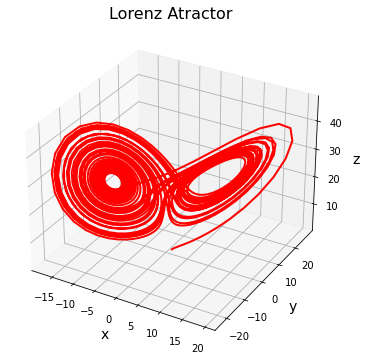

In [19]:
t0 = 0 # Initial time
tf = 40 # End Time
N = 2000 # Steps
x0 = [1,1,1] # Initial value
sol3d = lorenz.time_evolution(x0, par, t0, tf, N)
fig = plt.figure(figsize=(8, 6))
ax=  plt.axes(projection='3d')
sol3d.plot_trajectory("x-y-z", ax)
ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel("y", fontsize = 14)
ax.set_zlabel("z", fontsize = 14)
ax.set_title("Lorenz Atractor", fontsize = 16)

### Poincaré map

The [Poincaré map](https://en.wikipedia.org/wiki/Poincar%C3%A9_map) is used to study dynamical systems that present periodic behavior, solutions such as spirals that can converge or diverge to closed orbits, or simply a continuous state space of closed curves. 

Caospy determines these maps and then it is possible to plot them. Let's work with the Lorenz atractor defined above.

In [20]:
lorenz = cp.Lorenz() 
p = [10.0, 166.04, 8 / 3] # Parameters
x0 = [2.0, -1.0, 150.0] # Initial Conditions

To use Poincare function, you need to define the transient integration time, $t$_$disc$, which it will be discarded and the time in interest ($t$_$calc$). Caospy uses the scipy's solver [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), so you can set up the integration method between different options ("RK23", "RK45", etc) and properties of it as relative tolerance, max step, etc. 

In [21]:
poincare_lorenz = lorenz.poincare(x0, p,  t_disc=500, t_calc=40, met="DOP853",rel_tol=1e-12, abs_tol=1e-14, mx_step=0.002)

The map_v function generates the Poincaré map,  it's necessary to define in the first input the variable to map and the second is the variable where the hyper-surface will be traced. The function finds those points where the trajectory intersects the hyper-surface.

In [22]:
z_map = poincare_lorenz.map_v("z", "x")

Then you can plot the map.

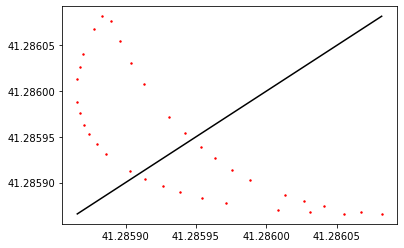

In [23]:
fig, ax = plt.subplots()
ax = z_map.plot_cobweb()

To plot the time vs. values of the variable when intersecting the hyper-surface, use the next Caospy's function.

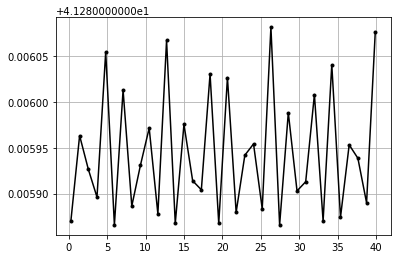

In [24]:
fig, ax = plt.subplots()
ax = z_map.plot_iterations()
ax.grid()